<a href="https://colab.research.google.com/github/juhi9697/QPowerAlgo/blob/master/QWR_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#!pip install qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, dagcircuit 
import numpy as np

from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
"""
we need to input how many steps the quantum system will take in total similar to CRW
if no of qubits is n then then the graph will have 2^(n-1) nodes or points to shift. here the first qubit will play the role of coin as in CRW.
"""
n_steps = 1 #Number of iterations
qubits= QuantumRegister(4, name = 'qubits')
cbits= ClassicalRegister(4, name= 'cbits')

#increment gate
print(len(qubits))
inc = QuantumCircuit (qubits,name='inc') #Circuit for inc operator
inc.rcccx( qubits[0],qubits[1],qubits[2],qubits[3])
inc.ccx(qubits[0],qubits[1],qubits[2])
inc.cx(qubits[0],qubits[1])
inc.draw()















4


┌────────┐          
qubits_0: ┤0       ├──■────■──
          │        │  │  ┌─┴─┐
qubits_1: ┤1       ├──■──┤ X ├
          │  RCCCX │┌─┴─┐└───┘
qubits_2: ┤2       ├┤ X ├─────
          │        │└───┘     
qubits_3: ┤3       ├──────────
          └────────┘

In [33]:
inc= inc.to_instruction()
#decrement gate
dec= QuantumCircuit (qubits,name='dec') #Circuit for dec operator
dec.x(qubits[0])
dec.x(qubits[1])
dec.x(qubits[2])
dec.rcccx( qubits[0],qubits[1],qubits[2],qubits[3])
dec.x(qubits[2])
dec.ccx(qubits[0],qubits[1],qubits[2])
dec.x(qubits[1])
dec.cx(qubits[0],qubits[1])
dec.x(qubits[0])
dec.draw()




┌───┐┌────────┐                    ┌───┐
qubits_0: ┤ X ├┤0       ├───────■─────────■──┤ X ├
          ├───┤│        │       │  ┌───┐┌─┴─┐└───┘
qubits_1: ┤ X ├┤1       ├───────■──┤ X ├┤ X ├─────
          ├───┤│  RCCCX │┌───┐┌─┴─┐└───┘└───┘     
qubits_2: ┤ X ├┤2       ├┤ X ├┤ X ├───────────────
          └───┘│        │└───┘└───┘               
qubits_3: ─────┤3       ├─────────────────────────
               └────────┘

In [34]:
dec= dec.to_instruction()
#Main Circuit

circ = QuantumCircuit (qubits, cbits) #Main circuit
#Fixing the coin spin either 0 or 1
#circ.x(qubits[0])

for i in range(n_steps):
 
 circ.h (qubits[0]) #Coin step
 circ.append (inc, [qubits[0],qubits[1],qubits[2],qubits[3]]) #Shift step
 circ.append (dec, [qubits[0],qubits[1],qubits[2],qubits[3]]) #Shift step

circ.measure ([qubits[0],qubits[1],qubits[2],qubits[3]], [cbits[0],cbits[1],cbits[2],cbits[3]])

# Draw the circuit
circ.draw()


┌───┐┌──────┐┌──────┐┌─┐         
qubits_0: ┤ H ├┤0     ├┤0     ├┤M├─────────
          └───┘│      ││      │└╥┘┌─┐      
qubits_1: ─────┤1     ├┤1     ├─╫─┤M├──────
               │  inc ││  dec │ ║ └╥┘┌─┐   
qubits_2: ─────┤2     ├┤2     ├─╫──╫─┤M├───
               │      ││      │ ║  ║ └╥┘┌─┐
qubits_3: ─────┤3     ├┤3     ├─╫──╫──╫─┤M├
               └──────┘└──────┘ ║  ║  ║ └╥┘
 cbits: 4/══════════════════════╩══╩══╩══╩═
                                0  1  2  3


Total counts are: {'0011': 494, '1110': 506}


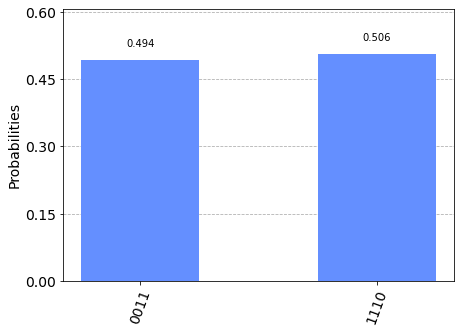

In [35]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)
# Plot a histogram
plot_histogram(counts)
